In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Setup enviornment

In [101]:
import graphviz
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz




Setup graph palettes

In [102]:

palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.set_style("white")
%matplotlib inline

Load dataset

In [103]:
data = pd.read_csv("../input/data.csv")
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Numbers of total target == 1

In [104]:
sum(data.target)

1020

Seperate the data

In [105]:
train, test = train_test_split(data, test_size = 0.3)
print("Training samples:{}; Test samples{}". format(len(train), len(test)))

Training samples:1411; Test samples606


Numbers of target = 1 in train data

In [107]:
sum(train.target)


715

Split series data by positive and negative

In [108]:
p_tempo = data[data['target'] == 1]['tempo']
n_tempo = data[data['target'] == 0]['tempo']
p_dance = data[data['target'] == 1]['danceability']
n_dance = data[data['target'] == 0]['danceability']
p_duration = data[data['target'] == 1]['duration_ms']
n_duration = data[data['target'] == 0]['duration_ms']
p_loudness = data[data['target'] == 1]['loudness']
n_loudness = data[data['target'] == 0]['loudness']
p_speechiness = data[data['target'] == 1]['speechiness']
n_speechiness = data[data['target'] == 0]['speechiness']
p_valence = data[data['target'] == 1]['valence']
n_valence = data[data['target'] == 0]['valence']
p_energy = data[data['target'] == 1]['energy']
n_energy = data[data['target'] == 0]['energy']
p_acousticness = data[data['target'] == 1]['acousticness']
n_acousticness = data[data['target'] == 0]['acousticness']
p_key = data[data['target'] == 1]['key']
n_key = data[data['target'] == 0]['key']
p_instrumentalness = data[data['target'] == 1]['instrumentalness']
n_instrumentalness = data[data['target'] == 0]['instrumentalness']





Sample histogram for song Tempo love/ hate distribution

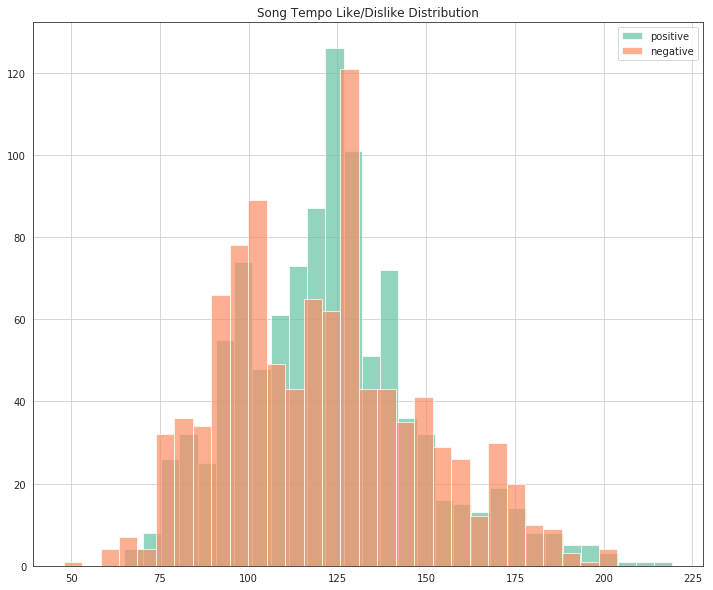

In [109]:
fig = plt.figure(figsize=(12, 10))
plt.title("Song Tempo Like/Dislike Distribution")
p_tempo.hist(alpha=0.7, bins=30, label='positive')
n_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

Similar steps for other variables


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

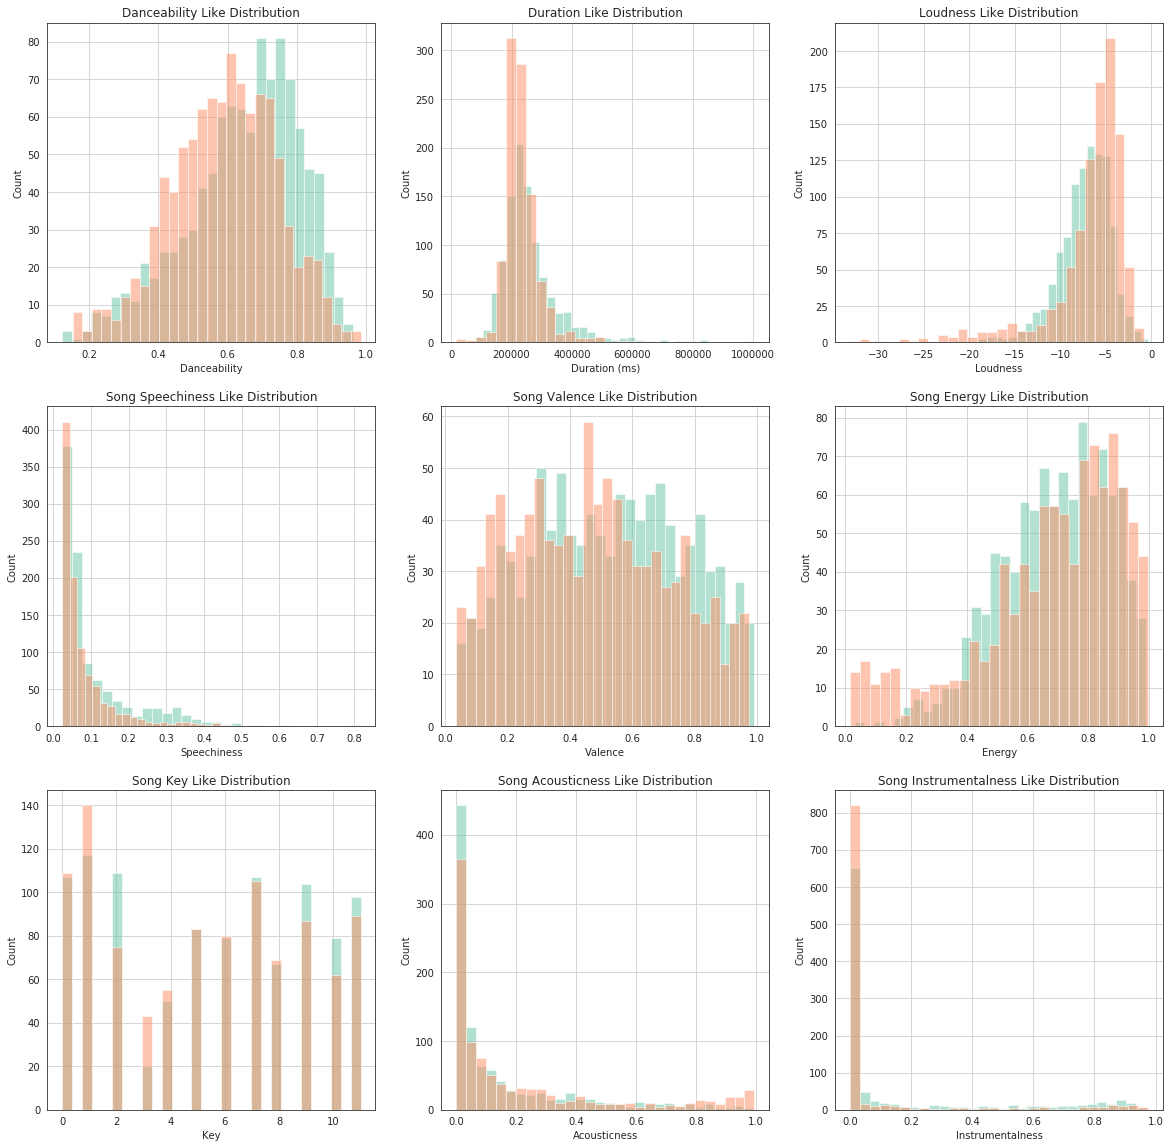

In [111]:
fig2 = plt.figure(figsize=(20, 20))

# Danceability
pic3 = fig2.add_subplot(331)
pic3.set_xlabel('Danceability')
pic3.set_ylabel('Count')
pic3.set_title("Danceability Like Distribution")
p_dance.hist(alpha=0.5, bins=30)
pic4 = fig2.add_subplot(331)
n_dance.hist(alpha=0.5, bins=30)


# Duration
pic5 = fig2.add_subplot(332)
p_duration.hist(alpha=0.5, bins=30)
pic5.set_xlabel('Duration (ms)')
pic5.set_ylabel('Count')
pic5.set_title("Duration Like Distribution")
pic6 = fig2.add_subplot(332)
n_duration.hist(alpha=0.5, bins=30)


# Loudness
pic7 = fig2.add_subplot(333)
p_loudness.hist(alpha=0.5, bins=30)
pic7.set_xlabel('Loudness')
pic7.set_ylabel('Count')
pic7.set_title("Loudness Like Distribution")

pic8 = fig2.add_subplot(333)
n_loudness.hist(alpha=0.5, bins=30)

# Speechiness
pic9 = fig2.add_subplot(334)
p_speechiness.hist(alpha=0.5, bins=30)
pic9.set_xlabel('Speechiness')
pic9.set_ylabel('Count')
pic9.set_title("Song Speechiness Like Distribution")

pic10 = fig2.add_subplot(334)
n_speechiness.hist(alpha=0.5, bins=30)

# Valence
pic11 = fig2.add_subplot(335)
p_valence.hist(alpha=0.5, bins=30)
pic11.set_xlabel('Valence')
pic11.set_ylabel('Count')
pic11.set_title("Song Valence Like Distribution")

pic12 = fig2.add_subplot(335)
n_valence.hist(alpha=0.5, bins=30)

# Energy
pic13 = fig2.add_subplot(336)
p_energy.hist(alpha=0.5, bins=30)
pic13.set_xlabel('Energy')
pic13.set_ylabel('Count')
pic13.set_title("Song Energy Like Distribution")

pic14 = fig2.add_subplot(336)
n_energy.hist(alpha=0.5, bins=30)

# Key
pic15 = fig2.add_subplot(337)
p_key.hist(alpha=0.5, bins=30)
pic15.set_xlabel('Key')
pic15.set_ylabel('Count')
pic15.set_title("Song Key Like Distribution")

pic15 = fig2.add_subplot(337)
n_key.hist(alpha=0.5, bins=30)

# Acousticness
pic16 = fig2.add_subplot(338)
p_acousticness.hist(alpha=0.5, bins=30)
pic16.set_xlabel('Acousticness')
pic16.set_ylabel('Count')
pic16.set_title("Song Acousticness Like Distribution")

pic16 = fig2.add_subplot(338)
n_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
pic17 = fig2.add_subplot(339)
p_instrumentalness.hist(alpha=0.5, bins=30)
pic17.set_xlabel('Instrumentalness')
pic17.set_ylabel('Count')
pic17.set_title("Song Instrumentalness Like Distribution")

pic17 = fig2.add_subplot(339)
n_instrumentalness.hist(alpha=0.5, bins=30)

Build a simple decision tree classifier based on a set of features

In [112]:
c = tree.DecisionTreeClassifier(min_samples_leaf = 50, 
                                random_state =10)


In [113]:
features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key"]

X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(X_train, y_train)


Run prediction on test data

In [114]:
y_prediction = c.predict(X_test)

In [115]:
score = accuracy_score(y_test, y_prediction)*100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}". format(rounded_score))


Decision Tree Classifier Accuracy: 72.3


In [116]:
y_tpre = c.predict(X_train)
score = accuracy_score(y_train, y_tpre)*100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}". format(rounded_score))

Decision Tree Classifier Accuracy: 76.5


In [117]:
hidden_neuron_nums = list(range(15,100))
#[2,3,4,5,6...9, 10, 20, 30, ... 90, 100, 125, 150, 175]
total_performance_records = []
for hn in hidden_neuron_nums:
    c_ = tree.DecisionTreeClassifier(min_samples_leaf=hn, random_state=10)
    perf_records_ = []
    for i in range(20):
         c_.fit(X_train, y_train)
         tst_p_ = c_.predict(X_test)
         performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
         perf_records_.append(performance)
    total_performance_records.append(np.mean(perf_records_))
    print ("Evaluate hidden layer {} done, accuracy {:.3f}".format(
        hn, total_performance_records[-1]))

Evaluate hidden layer 15 done, accuracy 0.723
Evaluate hidden layer 16 done, accuracy 0.739
Evaluate hidden layer 17 done, accuracy 0.701
Evaluate hidden layer 18 done, accuracy 0.706
Evaluate hidden layer 19 done, accuracy 0.706
Evaluate hidden layer 20 done, accuracy 0.706
Evaluate hidden layer 21 done, accuracy 0.718
Evaluate hidden layer 22 done, accuracy 0.738
Evaluate hidden layer 23 done, accuracy 0.733
Evaluate hidden layer 24 done, accuracy 0.734
Evaluate hidden layer 25 done, accuracy 0.734
Evaluate hidden layer 26 done, accuracy 0.733
Evaluate hidden layer 27 done, accuracy 0.733
Evaluate hidden layer 28 done, accuracy 0.733
Evaluate hidden layer 29 done, accuracy 0.733
Evaluate hidden layer 30 done, accuracy 0.733
Evaluate hidden layer 31 done, accuracy 0.733
Evaluate hidden layer 32 done, accuracy 0.728
Evaluate hidden layer 33 done, accuracy 0.728
Evaluate hidden layer 34 done, accuracy 0.718
Evaluate hidden layer 35 done, accuracy 0.713
Evaluate hidden layer 36 done, acc

Use random forest model

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 120)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))

Random Forest (n_est: 100) Accuracy: 79.2%


Conclude that random forest model is better than decision tree.